# SI630 Homework 2: Word2vec Vector Analysis

*Important Note:* Start this notebook only after you've gotten your word2vec model up and running!

Many NLP packages support working with word embeddings. In this notebook you can work through the various problems assigned in Task 3. We've provided the basic functionality for loading word vectors using [Gensim](https://radimrehurek.com/gensim/models/keyedvectors.html), a good library for learning and using word vectors, and for working with the vectors. 

One of the fun parts of word vectors is getting a sense of what they learned. Feel free to explore the vectors here! 

C:\Users\fangz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


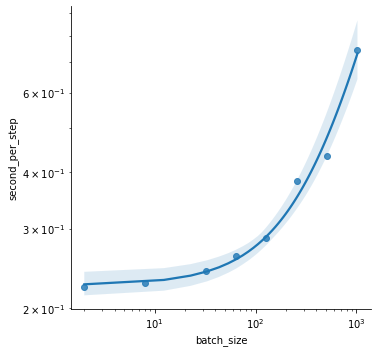

In [1]:
import seaborn as sns
import pandas as pd
batch_size_record = {}
# batch_size: second per iteration
batch_size_record['1024'] = 1/1.34
batch_size_record['512'] = 1/2.30
batch_size_record['256'] = 1/2.61
batch_size_record['128'] = 1/3.50
batch_size_record['64'] = 1/3.83
batch_size_record['32'] = 1/4.14
batch_size_record['8'] = 1/4.41
batch_size_record['2'] = 1/4.49
batch_size = [int(x) for x in batch_size_record.keys()]
data_per_second = [x/batch_size_record[str(x)] for x in batch_size]
second_per_step = list(batch_size_record.values())
data={'batch_size': batch_size, 'second_per_step': second_per_step}
df = pd.DataFrame(data)
grid = sns.lmplot('batch_size', 'second_per_step', df)
grid.set(xscale="log", yscale="log")

In [2]:
batch_size_record

{'1024': 0.7462686567164178,
 '512': 0.4347826086956522,
 '256': 0.3831417624521073,
 '128': 0.2857142857142857,
 '64': 0.2610966057441253,
 '32': 0.24154589371980678,
 '8': 0.22675736961451246,
 '2': 0.22271714922048996}

C:\Users\fangz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


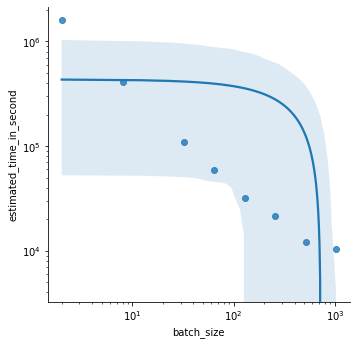

In [3]:
data_len = 14380797
estimated_time = [14380797/x for x in data_per_second]
data2={'batch_size': batch_size, 'estimated_time_in_second': estimated_time}
df2 = pd.DataFrame(data2)
batch_size_time = dict(zip(batch_size,estimated_time))
grid2 = sns.lmplot('batch_size', 'estimated_time_in_second', df2)
grid2.set(xscale="log", yscale="log")

In [4]:
batch_size_time

{1024: 10480.408261427237,
 512: 12211.953974184784,
 256: 21522.9840158046,
 128: 32099.993303571428,
 64: 58668.39507180156,
 32: 108550.70199275363,
 8: 407618.962585034,
 2: 1601425.0556792873}

In [5]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pandas as pd
from tqdm.auto import tqdm, trange

In [6]:
word_vectors = KeyedVectors.load_word2vec_format('final_target_embedding.kv', binary=False)

In [7]:
word_vectors["like"]

array([ 0.28103247, -0.22749808, -0.26300323, -0.36530143, -0.14277424,
       -0.16759185,  0.31335095, -0.35495207, -0.26011652, -0.11661258,
       -0.3245648 , -0.12575635,  0.3592852 , -0.04608218,  0.29119712,
       -0.2712163 , -0.1830573 ,  0.29489684, -0.713998  , -0.2516421 ,
        0.0212199 ,  0.18668355, -0.24616912, -0.37858272, -0.29992   ,
        0.32056215,  0.24285847,  0.25884962,  0.29480842,  0.27806824,
       -0.01103702,  0.47148338, -0.2770034 , -0.37314487,  0.46050078,
        0.19998902,  0.22213578,  0.43874803,  0.5452172 , -0.29531646,
        0.30928937, -0.40724614,  0.17798431,  0.3655836 ,  0.36441725,
        0.32560426, -0.42723948,  0.25485975, -0.24039952, -0.21408974],
      dtype=float32)

In [8]:
word_vectors.similar_by_word("books")

[('articles', 0.9681905508041382),
 ('novels', 0.9228975176811218),
 ('publications', 0.9198428988456726),
 ('essays', 0.9144321084022522),
 ('papers', 0.9111124277114868),
 ('chapters', 0.910556435585022),
 ('paintings', 0.9036913514137268),
 ('volumes', 0.901436984539032),
 ('stories', 0.9005518555641174),
 ('works', 0.9005295634269714)]

In [9]:
word_vectors.similar_by_word("food")

[('access', 0.9787462949752808),
 ('structure', 0.9745873808860779),
 ('carbon', 0.9739100933074951),
 ('products', 0.9736490845680237),
 ('solutions', 0.9734334945678711),
 ('data', 0.972178041934967),
 ('equipment', 0.9715787172317505),
 ('gas', 0.9713236689567566),
 ('financing', 0.9691336154937744),
 ('procedures', 0.9690237045288086)]

In [10]:
word_vectors.similar_by_word("friends")

[('beloved', 0.967647910118103),
 ('anecdote', 0.9650406241416931),
 ('alcoholic', 0.9612029194831848),
 ('irritation', 0.9545004367828369),
 ('agrees', 0.9542940258979797),
 ('uncles', 0.9529569745063782),
 ('grandmothers', 0.9527884125709534),
 ('plato', 0.9526079297065735),
 ('acquaintance', 0.9525284767150879),
 ('uppalavanna', 0.9520449638366699)]

In [11]:
word_vectors.similar_by_word("king")

[('vi', 0.9441969990730286),
 ('viii', 0.9224423170089722),
 ('queen', 0.9182277917861938),
 ('ix', 0.9157610535621643),
 ('duke', 0.9100890159606934),
 ('castile', 0.9082416892051697),
 ('xvi', 0.9079115390777588),
 ('rainulf', 0.9077125191688538),
 ('xii', 0.9060866832733154),
 ('vizier', 0.9056873917579651)]

In [12]:
word_vectors.similar_by_word("lonely")

[('lovely', 0.9847820997238159),
 ('goodbye', 0.9846696853637695),
 ('wonderful', 0.9829590916633606),
 ('wonder', 0.9826867580413818),
 ('joke', 0.9826573729515076),
 ('untold', 0.9813556671142578),
 ('goes', 0.9807004332542419),
 ('dare', 0.9805995225906372),
 ('pretty', 0.9799051284790039),
 ('forever', 0.9796646237373352)]

In [13]:
word_vectors.similar_by_word("eat")

[('look', 0.9859863519668579),
 ('everybody', 0.9859549403190613),
 ('listen', 0.9858463406562805),
 ('knows', 0.9853994846343994),
 ('feels', 0.9840623140335083),
 ('feeling', 0.9824504256248474),
 ('mean', 0.9818938374519348),
 ('nobody', 0.9816305637359619),
 ('whatever', 0.9811313152313232),
 ('talking', 0.9808884263038635)]

In [14]:
word_vectors.similar_by_word("obey")

[('pointed', 0.9823145866394043),
 ('recommend', 0.9794851541519165),
 ('inform', 0.9790245294570923),
 ('uncomfortable', 0.9778995513916016),
 ('confirm', 0.9767537713050842),
 ('testify', 0.9764970541000366),
 ('reminded', 0.9764170050621033),
 ('reluctant', 0.9763648509979248),
 ('denouncing', 0.976214587688446),
 ('offended', 0.9752349853515625)]

In [15]:
word_vectors.similar_by_word("whale")

[('wii', 0.9656943082809448),
 ('radiant', 0.9653333425521851),
 ('orbits', 0.9606861472129822),
 ('doubling', 0.9600025415420532),
 ('millers', 0.9564709067344666),
 ('torque', 0.955782413482666),
 ('discount', 0.9555608034133911),
 ('docked', 0.9545729160308838),
 ('ebay', 0.953877329826355),
 ('tropic', 0.9536764025688171)]

In [16]:
word_vectors.similar_by_word("planet")

[('noise', 0.9877550005912781),
 ('creators', 0.9865592122077942),
 ('voices', 0.985872745513916),
 ('quest', 0.9846154451370239),
 ('vintage', 0.9842861890792847),
 ('themed', 0.9839618802070618),
 ('heroes', 0.9830278754234314),
 ('suspense', 0.9818945527076721),
 ('uncut', 0.9817127585411072),
 ('poster', 0.980238676071167)]

In [17]:
word_vectors.similar_by_word("sisters")

[('siblings', 0.9742522835731506),
 ('brothers', 0.9641574025154114),
 ('older', 0.9511715769767761),
 ('sibling', 0.9439082145690918),
 ('daughters', 0.9424548745155334),
 ('fathered', 0.9365368485450745),
 ('adulthood', 0.9308114051818848),
 ('grandchildren', 0.9291739463806152),
 ('granddaughters', 0.9270073175430298),
 ('nephews', 0.9257288575172424)]

In [18]:
def get_analogy(a, b, c):
    return word_vectors.most_similar(positive=[b, c], negative=[a])[0][0]

In [19]:
def get_analogy_full(a, b, c):
    return word_vectors.most_similar(positive=[b, c], negative=[a])

In [20]:
get_analogy('man', 'woman', 'king')

'queen'

In [21]:
get_analogy('man', 'woman', 'actor')

'writer'

In [22]:
get_analogy('sleep', 'wake', 'bed')

'entrance'

In [23]:
get_analogy('sister','friend','sisters')

'friends'

In [24]:
get_analogy('hate','love','hard')

'kid'

In [25]:
get_analogy('one', 'six','jone')

'romão'

For (man, woman ,actor), actually I expect actress, but I got writer, I think it may have some relation with bias. For the (sleep, wake, bed) and (hate, love, hard) example, I think the model kind of get the semantic. For (sister, friend, sisters) and (one, six, jone) exmaples, it is not surprising.

In [26]:
model = KeyedVectors.load_word2vec_format('unbias_target_embedding.kv', binary=False)

In [27]:
test_data = pd.read_csv('word_pair_similarity_predictions.csv')
test_data.sample(5)
def convert(word, model):
    if word in model.key_to_index:
        # print(word)
        return [word]
    else:
        return ['behave']
for i in tqdm(range(len(test_data))):
    word1 = convert(test_data['word1'][i], model)
    word2 = convert(test_data['word2'][i], model)
    test_data['sim'][i] = model.n_similarity(word1, word2)
test_data.to_csv('word_pair_similarity_predictions.csv', index=False)

  0%|          | 0/1630 [00:00<?, ?it/s]

C:\Users\fangz\AppData\Local\Temp/ipykernel_15364/227412846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['sim'][i] = model.n_similarity(word1, word2)
